In [12]:
# import libraries
from sklearn.model_selection import StratifiedKFold,cross_val_score, cross_validate
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
from random import randrange
import pygraphviz as pgv
from pyvis.network import Network
%matplotlib inline

In [13]:
pos_df = pd.read_csv('/homes/fabadmus/Internship/RA/target')
neg_df = pd.read_csv('/homes/fabadmus/Internship/RA/control')

In [14]:
full_df = pd.read_csv('/homes/fabadmus/Internship/RA/model_data_path')

In [15]:
second_layer = pd.read_csv('/homes/fabadmus/Internship/RA/second_layer')

In [ ]:
def define_layers():
    pass

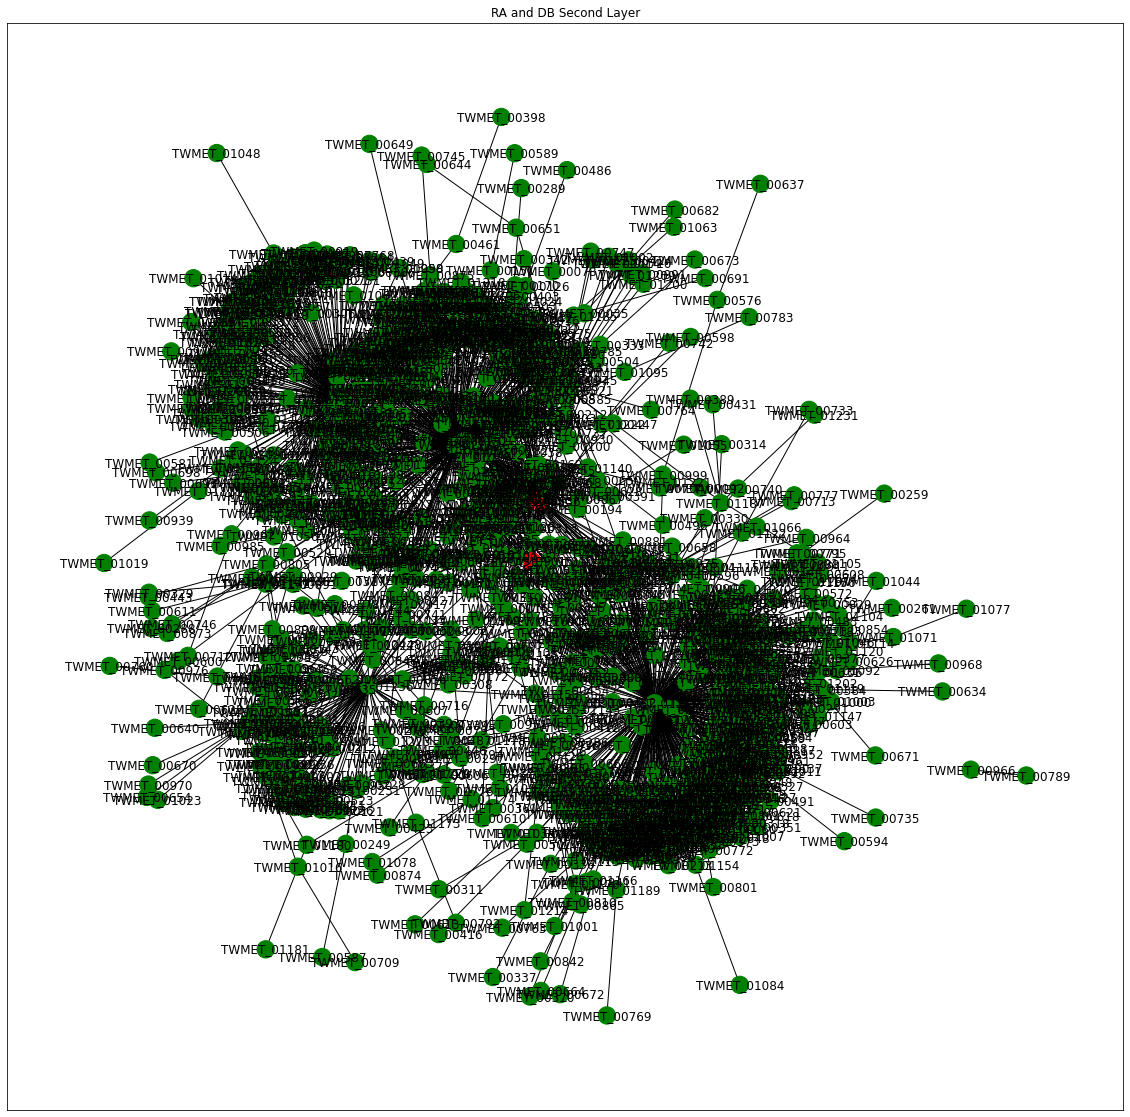

In [37]:
full_second_layer = pd.read_csv('/homes/fabadmus/Internship/RA/second_layer')
g = nx.from_pandas_edgelist(full_second_layer, source='subject',
                            target='object')
# plot the graph
plt.figure(10, figsize=(20, 20))
pos = nx.spring_layout(g, weight='local_mi', iterations=10)

#pos = nx.nx_agraph.graphviz_layout(g, prog="twopi", args="")
# test[test == '0'] = '#C6442A'
# test[test == '1'] = '#9E2AC6'
color_map = ['red' if node.startswith("TWDIS") else 'green' for node in g.nodes] 
nx.draw_networkx(g, node_color=color_map , pos=pos)
nx.draw_networkx_edge_labels(g, pos=pos, edge_labels=nx.get_edge_attributes(g, 'local_mi'), font_color="black",
);
plt.title('RA and DB Second Layer')
plt.show()

In [23]:
# convert the second_layer into a graph
second_layer = second_layer[second_layer.subject.str.startswith('TWDIS') == False]
G = nx.from_pandas_edgelist(second_layer, source='subject',
                            target='object', edge_attr='local_mi', edge_key='local_mi')

In [24]:

# load the embeddings of the graph

embeddings = Word2Vec.load('/homes/fabadmus/Internship/RA/embedding')

# Convert embeddings to dataframe

emb_df = (pd.DataFrame([embeddings.wv.get_vector(str(n))

                        for n in G.nodes], index=G.nodes))

#emb_df = (pd.DataFrame([embeddings.wv.get_vector]))

emb_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
TWMET_00001,-0.339276,-1.150513,0.166409,-0.390874,-0.112727,-0.051348,0.665741,1.294343,0.662023,-0.003811,0.289900,0.019437,1.104697,-0.444346,-0.563468,-0.296551
TWMET_01238,0.222262,-1.203445,-0.862582,-0.222269,0.817418,1.424485,0.968112,2.660369,1.503140,0.416045,-0.425093,-0.096436,2.018478,-1.680462,-0.456455,-2.064096
TWMET_00002,-0.452442,-1.010186,-0.054446,-0.100899,-0.357164,0.124080,1.073973,2.557782,0.393058,0.257072,0.444103,-0.313863,1.147887,-0.143013,-1.214973,-1.047516
TWMET_00003,-0.904609,-1.139994,-0.092145,-0.615887,-0.122870,0.731539,1.352558,2.495382,0.972551,-0.690551,0.319178,-0.281342,1.951932,-0.816375,-0.965543,-0.550748
TWMET_00004,-0.417364,-0.722037,0.024079,-0.852487,-0.039627,0.491036,0.724283,2.485959,0.880138,-0.018029,0.383717,-0.120559,1.212281,-0.536097,-0.964139,-0.844548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TWMET_01221,0.133232,0.090095,0.022273,-0.010499,-0.023612,0.086189,0.119507,-0.028915,-0.038049,-0.036451,0.100606,0.049256,-0.126856,-0.007842,0.046438,0.039270
TWMET_01223,-0.009966,-0.178847,0.102877,0.042389,0.046902,-0.023985,-0.217746,0.061486,-0.018413,-0.064849,-0.092578,-0.135524,0.148721,0.003554,-0.148233,-0.160946
TWMET_01230,-0.060095,0.002374,0.067220,-0.028809,-0.067943,0.040358,-0.085353,0.037156,0.077870,-0.042543,-0.112073,-0.128738,0.151641,-0.049332,0.023165,-0.069525
TWMET_01231,-0.227808,0.145456,-0.014531,0.145162,-0.052715,-0.002205,-0.703074,-0.102153,-0.333621,0.066679,-0.494216,-0.178144,0.189802,0.136972,-0.166191,-0.147935


In [25]:
# get set of positive and negative concepts from the full data
pos = set(full_df[full_df['label'] == 'POS'].object)
neg = set(full_df[full_df['label'] == 'NEG'].object)

In [26]:
# create separate dataframes of embeddings bases on the sets
emb_df_pos = emb_df[emb_df.index.isin(pos)]
emb_df_pos['set'] = 'POS'
emb_df_neg = emb_df[emb_df.index.isin(neg)]
emb_df_neg['set'] = 'NEG'

/tmp/ipykernel_3030875/3669145909.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emb_df_pos['set'] = 'POS'
/tmp/ipykernel_3030875/3669145909.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emb_df_neg['set'] = 'NEG'


In [27]:
# inspecting
print(len(emb_df_pos))
print(len(emb_df_neg))

61
63


In [28]:
# create a dataframe for the training from the labeled concepts
model_df = pd.concat([emb_df_pos, emb_df_neg])
model_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,set
TWMET_00009,-0.147276,-1.417716,0.237359,-0.707743,-0.055693,0.209874,1.051276,2.074403,0.844698,-0.147389,0.549457,-0.242458,1.733868,-0.535141,-0.572833,-0.726939,POS
TWMET_00019,0.449416,-0.706250,0.338384,-0.920871,0.051655,-0.347633,-1.744840,-0.786246,0.844761,-1.188342,-1.722566,-0.676494,0.547020,-0.230462,1.619031,-0.828952,POS
TWMET_00025,-0.002991,-0.963894,0.302442,-0.507833,-0.788059,1.031028,1.555686,2.341543,0.888543,-0.940081,-0.209835,-0.552929,1.687396,-1.051547,-1.083187,-0.668332,POS
TWMET_00026,-0.634303,-1.207597,-0.079782,-0.640649,-0.117010,0.079681,0.834849,2.120512,0.747434,-0.519169,0.285202,-0.132660,1.389666,-0.625496,-0.762243,-0.601871,POS
TWMET_00036,-0.023241,-0.313175,0.126689,-0.082538,0.111970,-0.030777,-0.051269,0.240090,0.180916,-0.030021,-0.025555,-0.130472,0.411860,-0.077783,-0.180723,-0.166807,POS


In [29]:
# create validation data from the embedding data
validation_df = pd.concat([emb_df_pos, emb_df_neg, emb_df]).drop_duplicates(
    subset=emb_df.columns[:-1], keep=False)
validation_df = validation_df[validation_df.index.str.startswith('TWDIS') == False]
validation_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,set
TWMET_00001,-0.339276,-1.150513,0.166409,-0.390874,-0.112727,-0.051348,0.665741,1.294343,0.662023,-0.003811,0.289900,0.019437,1.104697,-0.444346,-0.563468,-0.296551,NaN
TWMET_01238,0.222262,-1.203445,-0.862582,-0.222269,0.817418,1.424485,0.968112,2.660369,1.503140,0.416045,-0.425093,-0.096436,2.018478,-1.680462,-0.456455,-2.064096,NaN
TWMET_00002,-0.452442,-1.010186,-0.054446,-0.100899,-0.357164,0.124080,1.073973,2.557782,0.393058,0.257072,0.444103,-0.313863,1.147887,-0.143013,-1.214973,-1.047516,NaN
TWMET_00003,-0.904609,-1.139994,-0.092145,-0.615887,-0.122870,0.731539,1.352558,2.495382,0.972551,-0.690551,0.319178,-0.281342,1.951932,-0.816375,-0.965543,-0.550748,NaN
TWMET_00004,-0.417364,-0.722037,0.024079,-0.852487,-0.039627,0.491036,0.724283,2.485959,0.880138,-0.018029,0.383717,-0.120559,1.212281,-0.536097,-0.964139,-0.844548,NaN


In [30]:
# assign the independent and dependent variables
X = model_df.iloc[:,:-1].values
y = model_df['set']

In [31]:
# split into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42) 

In [32]:
from sklearn.model_selection import GridSearchCV
param_grid = {'min_samples_leaf':[3,5,7,10,15],'max_features':[0.5,'sqrt','log2'],
          'max_depth':[10,15,20],
          'class_weight':[{"POS":1,"NEG":1},'balanced'],
          'criterion':['entropy','gini']}


model1 = GridSearchCV(RandomForestClassifier(),param_grid, verbose=1,n_jobs=-1,scoring='roc_auc')
model1.fit(X_train,y_train)
print ('\n',model1.best_estimator_)

Fitting 5 folds for each of 180 candidates, totalling 900 fits

 RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=15, max_features='log2', min_samples_leaf=3)


/commons/conda/firdaws_project/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


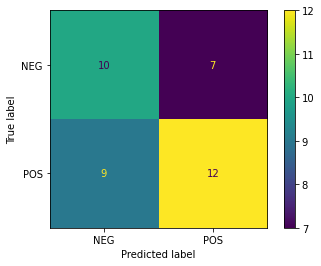

In [33]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model1, X_test, y_test)
plt.show()

/commons/conda/firdaws_project/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


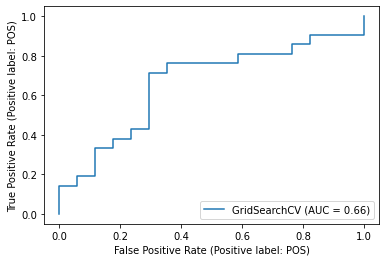

In [30]:
metrics.plot_roc_curve(model1, X_test, y_test)

In [20]:
from sklearn.model_selection import StratifiedKFold,cross_val_score

model2 = RandomForestClassifier(random_state=0, class_weight='balanced', criterion='entropy',
                       max_depth=20, max_features=0.5, min_samples_leaf=3)

score = cross_val_score(model2, X_train, y_train,  scoring="accuracy")
model2.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=20, max_features=0.5, min_samples_leaf=3,
                       random_state=0)

In [21]:
print(f'Scores are: {score}')

Scores are: [0.66666667 0.70588235 0.52941176 0.52941176 0.41176471]


/commons/conda/firdaws_project/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


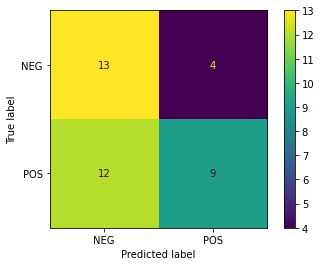

In [22]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model2, X_test, y_test)
plt.show()

/commons/conda/firdaws_project/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


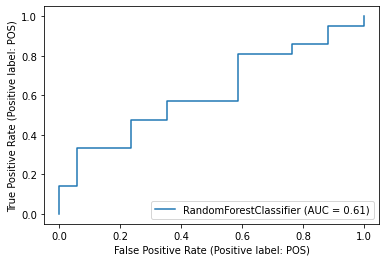

In [23]:
metrics.plot_roc_curve(model2, X_test, y_test)

In [24]:
# make predictions on the unknown
X_val = validation_df.iloc[:,:-1]

pred = model2.predict(X_val)

In [25]:
val_proba = model2.predict_proba(X_val)

In [26]:
# convert predictions and actual values to dataframe
val_proba_df = pd.DataFrame(val_proba, index=X_val.index,
                                columns=['NEG_prob', 'POS_prob'])
val_proba_df['predictions'] = pred
val_proba_df = val_proba_df.sort_values('POS_prob', ascending=False)
val_proba_df

,NEG_prob,POS_prob,predictions
TWMET_00042,0.125198,0.874802,POS
TWMET_00137,0.142399,0.857601,POS
TWMET_00345,0.165118,0.834882,POS
TWMET_01008,0.168760,0.831240,POS
TWMET_00199,0.172006,0.827994,POS
...,...,...,...
TWMET_01188,0.890925,0.109075,NEG
TWMET_00022,0.898286,0.101714,NEG
TWMET_00244,0.910951,0.089049,NEG
TWMET_00074,0.932050,0.067950,NEG


In [27]:
import requests
session = requests.Session()
base_url = 'https://apimlqv2.tenwiseservice.nl/api/mlquery/'
session.headers['referer'] = 'https://apimlqv2.tenwiseservice.nl'
session.get(f"{base_url}start/")

payload = {'apikey': '',
           'csrfmiddlewaretoken': session.cookies.get_dict()['csrftoken']}

# annotate predictions
ids = list(val_proba_df.index)
payload['concept_ids'] = ",".join(ids)
results = session.post(f"{base_url}conceptset/annotation/", payload)
js = results.json()
annotation = js['result']['annotation']
# get ids
annotated_ids = []
for id in ids:
    annotated_ids.extend(annotation[id]['name'])
# add ids to the dataframe
val_proba_df['annotation'] = annotated_ids
val_proba_df.head(10)

,NEG_prob,POS_prob,predictions,annotation
TWMET_00042,0.125198,0.874802,POS,CO
TWMET_00137,0.142399,0.857601,POS,chlorophyll
TWMET_00345,0.165118,0.834882,POS,aglycon
TWMET_01008,0.168760,0.831240,POS,isoamyl acetate
TWMET_00199,0.172006,0.827994,POS,aniline
TWMET_00438,0.186428,0.813572,POS,gulonolactone
TWMET_00945,0.188278,0.811722,POS,gibberellin
TWMET_00889,0.192161,0.807839,POS,dicumarol
TWMET_00209,0.193541,0.806459,POS,hexane
TWMET_00031,0.200616,0.799384,POS,aspirin
